In [61]:
import requests
import geopandas as gpd

url = "https://github.com/Spatial-Data-Analytics-2025/Homework1/raw/refs/heads/main/South_America_8857.gpkg"

# Download to local file
r = requests.get(url)
with open("South_America_8857.gpkg", "wb") as f:
    f.write(r.content)

# Then read locally
gpd.list_layers("South_America_8857.gpkg")

,name,geometry_type
0,continent,MultiPolygon
1,mobiles_ddm,Point
2,mobiles_psm,Point


In [62]:
countries=gpd.read_file(linkGit+linkWorldMaps,layer='countries')
# see some
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
3,Algeria,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ..."


In [63]:
import pandas as pd

someDataLink='some_dataworld.csv'

someData=pd.read_csv(linkGit+someDataLink)

## data available
someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       172 non-null    object 
 1   iso2          171 non-null    object 
 2   iso3          172 non-null    object 
 3   region        172 non-null    object 
 4   fragility     172 non-null    float64
 5   co2           172 non-null    int64  
 6   sq_km         172 non-null    int64  
 7   num_airports  172 non-null    int64  
 8   population    172 non-null    int64  
 9   mobiles       172 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 13.6+ KB


In [64]:
someData.head()

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles
0,AFGHANISTAN,AF,AFG,SOUTH ASIA,105.0,7893000,652230,68,40121552,23000000
1,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000
2,ALGERIA,DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000
3,ANGOLA,AO,AGO,AFRICA,87.8,19362000,1246700,107,37202061,25700000
4,ANTIGUA AND BARBUDA,AG,ATG,CENTRAL AMERICA AND THE CARIBBEAN,54.4,729000,443,4,102634,184000


In [65]:
linkToIndicators="https://github.com/Spatial-Data-Analytics-2025/Homework1/raw/refs/heads/main/worldindicators.json"
theMapAndData=gpd.read_file(linkToIndicators)
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country       172 non-null    object  
 1   iso2          171 non-null    object  
 2   iso3          172 non-null    object  
 3   region        172 non-null    object  
 4   fragility     172 non-null    float64 
 5   co2           172 non-null    int64   
 6   sq_km         172 non-null    int32   
 7   num_airports  172 non-null    int32   
 8   population    172 non-null    int32   
 9   mobiles       172 non-null    int32   
 10  geometry      172 non-null    geometry
dtypes: float64(1), geometry(1), int32(4), int64(1), object(4)
memory usage: 12.2+ KB


Dot Density Map

In [66]:
theMapAndData.region.value_counts()

,count
region,
AFRICA,52
EUROPE,37
MIDDLE EAST,16
CENTRAL AMERICA AND THE CARIBBEAN,16
EAST AND SOUTHEAST ASIA,15
SOUTH AMERICA,12
SOUTH ASIA,8
AUSTRALIA AND OCEANIA,7
CENTRAL ASIA,6


<Axes: >

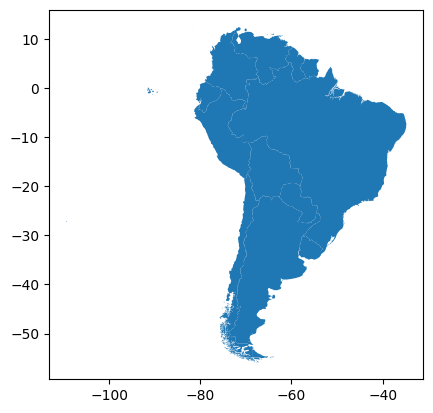

In [67]:
South_America=theMapAndData[theMapAndData.region=='SOUTH AMERICA']
South_America.plot()

In [68]:
print(South_America.population.describe().to_string(float_format=lambda x: f'{x:.0f}'))

count          12
mean     36846680
std      60107441
min        646758
25%       6498244
50%      18487318
75%      36198783
max     220051512


In [69]:
(South_America.set_index("Country").mobiles / 100000).astype(int).sort_values()

,mobiles
Country,
GUYANA,8
SURINAME,9
URUGUAY,48
PARAGUAY,86
BOLIVIA,120
ECUADOR,182
VENEZUELA,188
CHILE,267
PERU,413


In [70]:
# a copy of South America
temporal_gdf=South_America.copy()
temporal_gdf.head()

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
7,ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
18,BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,"MULTIPOLYGON (((-62.19884 -20.47139, -62.26945..."
22,BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
34,CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,"MULTIPOLYGON (((-73.61806 -51.6339, -73.60494 ..."
37,COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."


In [71]:
# the row names will be the country
temporal_gdf.set_index('Country',inplace=True)

# we have this now
temporal_gdf.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
Country,,,,,,,,,,
ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,"MULTIPOLYGON (((-62.19884 -20.47139, -62.26945..."
BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,"MULTIPOLYGON (((-73.61806 -51.6339, -73.60494 ..."
COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."


In [72]:
temporal_gdf['dots_per_country'] = (South_America['mobiles'] / 100000).astype(int).values # notice .values!

# see
temporal_gdf['dots_per_country'].head(10)

,dots_per_country
Country,
ARGENTINA,627
BOLIVIA,120
BRAZIL,2130
CHILE,267
COLOMBIA,874
ECUADOR,182
GUYANA,8
SURINAME,9
PARAGUAY,86


In [73]:
# enter 'sample_points()'
temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123).head(12)

,sampled_points
Country,
ARGENTINA,"MULTIPOINT ((-72.97688 -50.5553), (-72.57444 -..."
BOLIVIA,"MULTIPOINT ((-69.00307 -15.71523), (-68.87797 ..."
BRAZIL,"MULTIPOINT ((-73.51659 -7.45893), (-73.47689 -..."
CHILE,"MULTIPOINT ((-75.12609 -48.48531), (-75.11804 ..."
COLOMBIA,"MULTIPOINT ((-78.69498 1.37435), (-78.54284 1...."
ECUADOR,"MULTIPOINT ((-91.38028 -0.05334), (-91.26648 -..."
GUYANA,"MULTIPOINT ((-60.57363 5.78355), (-60.52443 7...."
SURINAME,"MULTIPOINT ((-57.85152 3.97306), (-57.17116 2...."
PARAGUAY,"MULTIPOINT ((-62.10509 -21.68843), (-61.84341 ..."


In [74]:
type(temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123))

geopandas.geoseries.GeoSeries

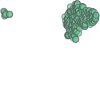

In [75]:
temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123).loc['ECUADOR']

In [76]:
South_America_dots=gpd.GeoDataFrame(geometry=temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123))
South_America_dots.head(12)

,geometry
Country,
ARGENTINA,"MULTIPOINT ((-72.97688 -50.5553), (-72.57444 -..."
BOLIVIA,"MULTIPOINT ((-69.00307 -15.71523), (-68.87797 ..."
BRAZIL,"MULTIPOINT ((-73.51659 -7.45893), (-73.47689 -..."
CHILE,"MULTIPOINT ((-75.12609 -48.48531), (-75.11804 ..."
COLOMBIA,"MULTIPOINT ((-78.69498 1.37435), (-78.54284 1...."
ECUADOR,"MULTIPOINT ((-91.38028 -0.05334), (-91.26648 -..."
GUYANA,"MULTIPOINT ((-60.57363 5.78355), (-60.52443 7...."
SURINAME,"MULTIPOINT ((-57.85152 3.97306), (-57.17116 2...."
PARAGUAY,"MULTIPOINT ((-62.10509 -21.68843), (-61.84341 ..."


In [77]:
South_America_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 12 entries, ARGENTINA to VENEZUELA
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  12 non-null     geometry
dtypes: geometry(1)
memory usage: 492.0+ bytes


In [78]:
South_America_8857=South_America.to_crs(8857)
South_America_dots_8857=South_America_dots.to_crs(8857)

<Axes: >

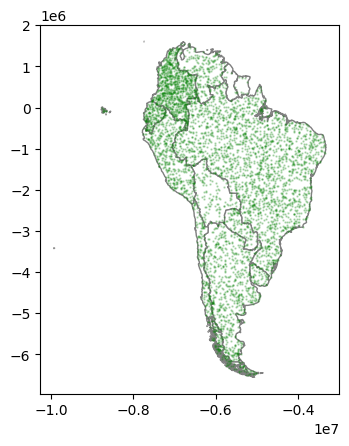

In [79]:
base=South_America_8857.plot(facecolor="white",
                              edgecolor='grey')
South_America_dots_8857.plot(markersize=0.50, color='green',ax=base, alpha=0.25)

In [80]:
South_America_dots_8857.explode()

,geometry
Country,
ARGENTINA,POINT (-5746637.526 -6041623.825)
ARGENTINA,POINT (-5761586.238 -5940832.423)
ARGENTINA,POINT (-5759753.003 -5942257.51)
ARGENTINA,POINT (-5806608.055 -5825522.106)
ARGENTINA,POINT (-5700009.892 -6035828.779)
...,...
VENEZUELA,POINT (-5856317.141 1054500.556)
VENEZUELA,POINT (-5847050.412 839135.817)
VENEZUELA,POINT (-5840656.735 857872.281)


In [81]:
South_America_dots_8857.explode(ignore_index=True)

,geometry
0,POINT (-5746637.526 -6041623.825)
1,POINT (-5761586.238 -5940832.423)
2,POINT (-5759753.003 -5942257.51)
3,POINT (-5806608.055 -5825522.106)
4,POINT (-5700009.892 -6035828.779)
...,...
4947,POINT (-5856317.141 1054500.556)
4948,POINT (-5847050.412 839135.817)
4949,POINT (-5840656.735 857872.281)
4950,POINT (-5805547.67 1084887.244)


In [82]:
type(South_America_dots_8857.explode(ignore_index=True))

geopandas.geodataframe.GeoDataFrame

In [83]:
South_America_dots_8857=South_America_dots_8857.explode(ignore_index=True)

Proportional Symbol Map

In [84]:
import numpy as np

max_size=40
min_size=1
scaled_sizes = np.sqrt(
    (South_America_8857.mobiles - South_America_8857.mobiles.min()) / (South_America_8857.mobiles.max() - South_America_8857.mobiles.min())
) * (max_size-1) + min_size

scaled_sizes.sort_values()

,mobiles
67,1.000000
116,1.976506
159,6.317625
119,8.484899
18,9.938606
47,12.151258
161,12.342502
34,14.612224
120,18.028496
7,22.057074


In [85]:
South_America_8857_symbols = South_America_8857.copy()
South_America_8857_symbols.set_index('Country',inplace=True)

#this is just a copy (new index names)
South_America_8857_symbols.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
Country,,,,,,,,,,
ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,"MULTIPOLYGON (((-6161774.577 -4522341.275, -61..."
BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,"MULTIPOLYGON (((-5779504.563 -2602017.231, -57..."
BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,"MULTIPOLYGON (((-6717975.427 -1275037.248, -67..."
CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,"MULTIPOLYGON (((-5745302.837 -6148849.693, -57..."
COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,"MULTIPOLYGON (((-7740199.139 1598463.703, -774..."


In [86]:
South_America_8857_symbols['size']=scaled_sizes.values # notice .values!

In [87]:

South_America_8857_symbols['geometry'] = South_America_8857_symbols['geometry'].centroid

South_America_8857_symbols

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size
Country,,,,,,,,,,,
ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,POINT (-5662635.537 -4288178.971),22.057074
BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,POINT (-6068711.373 -2125321.301),9.938606
BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,POINT (-5031270.911 -1340905.017),40.000000
CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,POINT (-6129887.491 -4440461.25),14.612224
COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,POINT (-6986996.354 498813.099),25.909655
ECUADOR,EC,ECU,SOUTH AMERICA,71.2,36051000,283561,317,18309984,18200000,POINT (-7543722.37 -183244.937),12.151258
GUYANA,GY,GUY,SOUTH AMERICA,68.2,2743000,214969,55,794099,856000,POINT (-5638909.782 614595.658),1.000000
SURINAME,SR,SUR,SOUTH AMERICA,61.9,2372000,163820,55,646758,989000,POINT (-5349371.748 529755.667),1.976506
PARAGUAY,PY,PRY,SOUTH AMERICA,67.0,7896000,406752,83,7522549,8670000,POINT (-5379307.905 -2939102.978),8.484899


<Axes: >

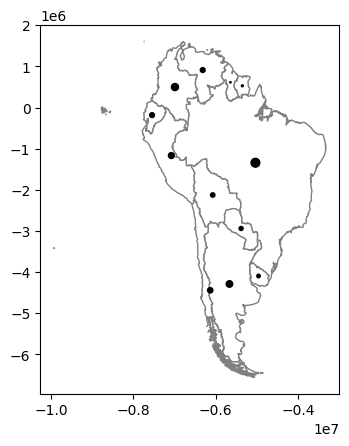

In [88]:
base=South_America_8857.plot(facecolor="white",
                      edgecolor='grey')
# Plot the centroids on top
South_America_8857_symbols.plot(
    ax=base,
    markersize=South_America_8857_symbols['size'],
    color='black'
)

In [89]:

%pip install folium mapclassify matplotlib
base=South_America_8857[South_America_8857.Country=="CHILE"].explore()
South_America_8857[South_America_8857_symbols.index=="CHILE"].explore(m=base,color="red")

In [90]:
South_America_8857_symbols["geometry"]=South_America_8857.representative_point().values

In [91]:
base=South_America[South_America.Country=="CHILE"].explore()
South_America_8857_symbols[South_America_8857_symbols.index=="CHILE"].explore(m=base,color="red")

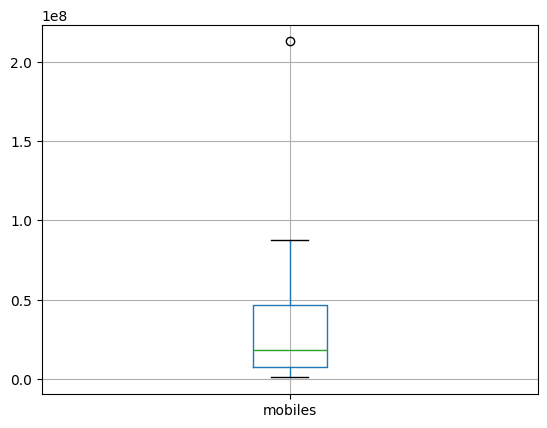

In [92]:
boxplotInfo=South_America_8857_symbols.boxplot(column='mobiles',return_type="dict")

In [93]:
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([213000000], dtype=object)

In [94]:
South_America_8857_symbols[South_America_8857_symbols.mobiles.isin(outliers)].index

Index(['BRAZIL'], dtype='object', name='Country')

In [95]:
South_America_8857_symbols['mobiles_outlier']=South_America_8857_symbols.mobiles.isin(outliers)*1

## see
South_America_8857_symbols

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size,mobiles_outlier
Country,,,,,,,,,,,,
ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,POINT (-5553772.712 -4493827.822),22.057074,0
BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,POINT (-6065512.507 -2073238.575),9.938606,0
BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,POINT (-4700709.502 -1764170.762),40.000000,1
CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,POINT (-6234313.161 -4304799.911),14.612224,0
COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,POINT (-6936232.356 525486.665),25.909655,0
ECUADOR,EC,ECU,SOUTH AMERICA,71.2,36051000,283561,317,18309984,18200000,POINT (-7496744.998 -227636.718),12.151258,0
GUYANA,GY,GUY,SOUTH AMERICA,68.2,2743000,214969,55,794099,856000,POINT (-5636237.099 628135.992),1.000000,0
SURINAME,SR,SUR,SOUTH AMERICA,61.9,2372000,163820,55,646758,989000,POINT (-5370305.407 503625.945),1.976506,0
PARAGUAY,PY,PRY,SOUTH AMERICA,67.0,7896000,406752,83,7522549,8670000,POINT (-5383797.6 -2964049.838),8.484899,0


<Axes: >

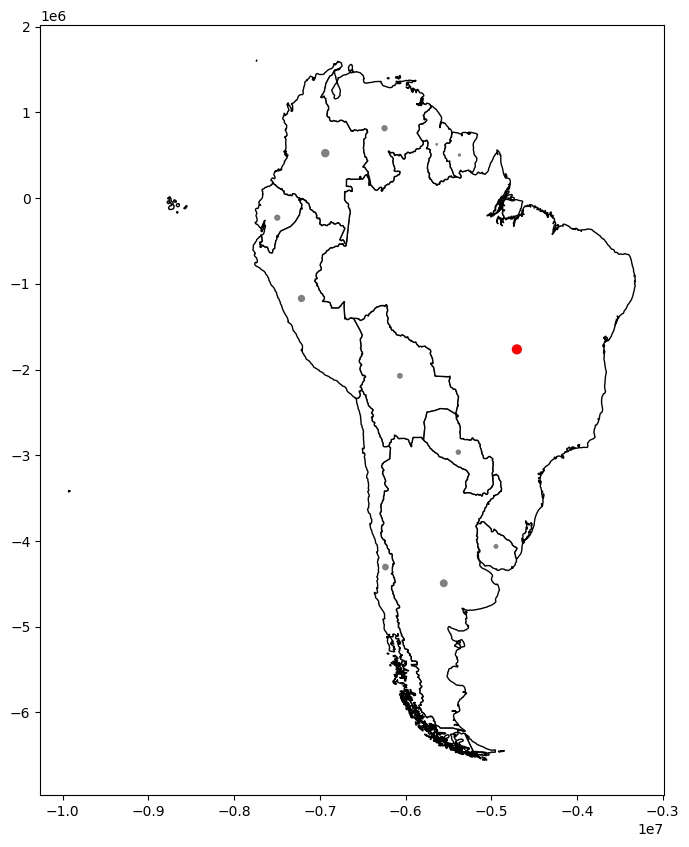

In [96]:
base = South_America_8857.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'red', 0: 'grey'}

# Plot the centroids on top
South_America_8857_symbols.plot(
    ax=base,
    markersize=South_America_8857_symbols['size'],
    color=South_America_8857_symbols['mobiles_outlier'].map(mapcolor)
)

In [97]:
South_America_8857_symbols.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size,mobiles_outlier
Country,,,,,,,,,,,,
ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,POINT (-5553772.712 -4493827.822),22.057074,0
BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,POINT (-6065512.507 -2073238.575),9.938606,0
BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,POINT (-4700709.502 -1764170.762),40.000000,1
CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,POINT (-6234313.161 -4304799.911),14.612224,0
COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,POINT (-6936232.356 525486.665),25.909655,0


In [98]:
South_America_8857_symbols.reset_index(drop=False, inplace=True)
South_America_8857_symbols.drop(columns=['iso2', 'region', 'fragility', 'co2', 'sq_km', 'num_airports','mobiles'], inplace=True)

## final for R:
South_America_8857_symbols.head()

,Country,iso3,population,geometry,size,mobiles_outlier
0,ARGENTINA,ARG,46994384,POINT (-5553772.712 -4493827.822),22.057074,0
1,BOLIVIA,BOL,12311974,POINT (-6065512.507 -2073238.575),9.938606,0
2,BRAZIL,BRA,220051512,POINT (-4700709.502 -1764170.762),40.000000,1
3,CHILE,CHL,18664652,POINT (-6234313.161 -4304799.911),14.612224,0
4,COLOMBIA,COL,49588357,POINT (-6936232.356 525486.665),25.909655,0


Choropleths

<Axes: >

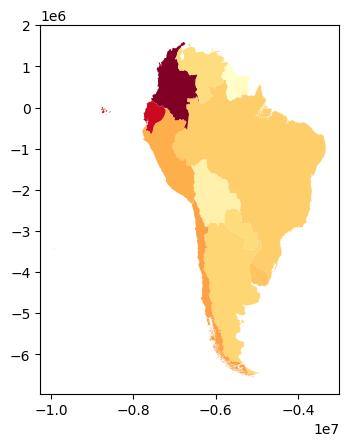

In [99]:
South_America_8857.plot(South_America_8857.mobiles/South_America_8857.sq_km,cmap="YlOrRd")

In [100]:
South_America_8857['mobiles_density']=South_America_8857.mobiles/South_America_8857.sq_km

In [101]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=South_America_8857['mobiles_density']

# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [102]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

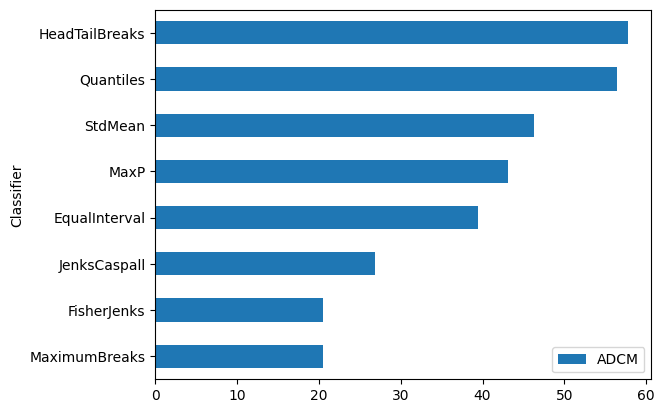

In [103]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [104]:
South_America_8857['mobiles_density_FJ5'] = fj5.yb # yb will give you a numeric label

In [105]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

South_America_8857['mobiles_density_FJ5_cat']=South_America_8857.loc[:,'mobiles_density_FJ5'].replace(newLabelsForLevels)

# we have
South_America_8857[['mobiles_density','mobiles_density_FJ5','mobiles_density_FJ5_cat']].head(20)

,mobiles_density,mobiles_density_FJ5,mobiles_density_FJ5_cat
7,22.550712,1,1_Low
18,10.923182,0,0_VeryLow
22,25.012418,1,1_Low
34,35.312696,2,2_Middle
37,76.740041,4,4_VeryHigh
47,64.183721,3,3_High
67,3.981969,0,0_VeryLow
116,6.037114,0,0_VeryLow
119,21.315199,1,1_Low
120,32.134676,2,2_Middle


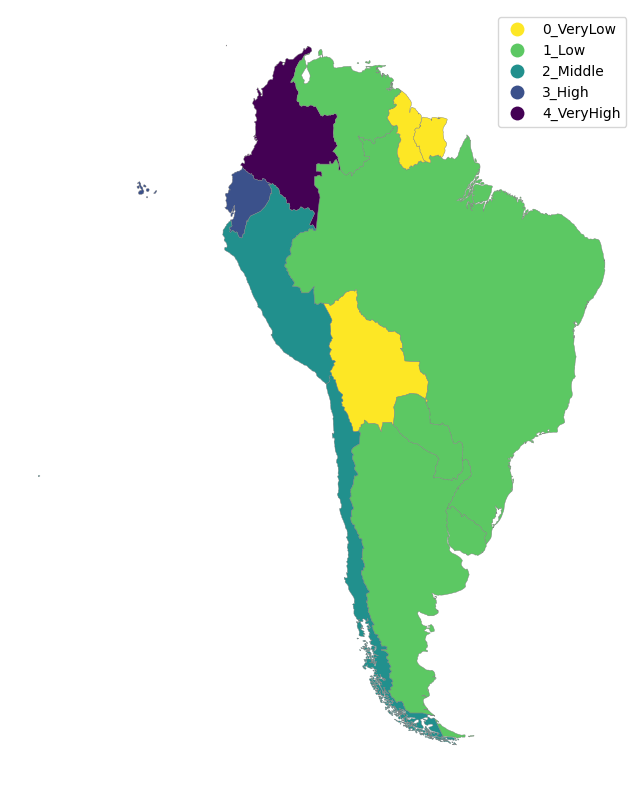

In [106]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
South_America_8857.plot(column='mobiles_density_FJ5_cat', # variable to plot
                 cmap='viridis_r', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='grey', # border color
                 linewidth=0.3, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()

In [107]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
countries
_3
theMapAndData
South_America
temporal_gdf
_11
_12
South_America_dots
_17
South_America_8857
South_America_dots_8857
_21
_22
South_America_8857_symbols
_26
_28
_36
_38
_39
_62
_70
_71
_76
_80
_81
_85
_87
_95
_97
_98


In [108]:
South_America_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 12 entries, 7 to 161
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Country                  12 non-null     object  
 1   iso2                     12 non-null     object  
 2   iso3                     12 non-null     object  
 3   region                   12 non-null     object  
 4   fragility                12 non-null     float64 
 5   co2                      12 non-null     int64   
 6   sq_km                    12 non-null     int32   
 7   num_airports             12 non-null     int32   
 8   population               12 non-null     int32   
 9   mobiles                  12 non-null     int32   
 10  geometry                 12 non-null     geometry
 11  mobiles_density          12 non-null     float64 
 12  mobiles_density_FJ5      12 non-null     int64   
 13  mobiles_density_FJ5_cat  12 non-null     object  
dtypes: float

In [109]:
South_America_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 12 entries, 7 to 161
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Country                  12 non-null     object  
 1   iso2                     12 non-null     object  
 2   iso3                     12 non-null     object  
 3   region                   12 non-null     object  
 4   fragility                12 non-null     float64 
 5   co2                      12 non-null     int64   
 6   sq_km                    12 non-null     int32   
 7   num_airports             12 non-null     int32   
 8   population               12 non-null     int32   
 9   mobiles                  12 non-null     int32   
 10  geometry                 12 non-null     geometry
 11  mobiles_density          12 non-null     float64 
 12  mobiles_density_FJ5      12 non-null     int64   
 13  mobiles_density_FJ5_cat  12 non-null     object  
dtypes: float

In [110]:
South_America_8857_symbols.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Country          12 non-null     object  
 1   iso3             12 non-null     object  
 2   population       12 non-null     int32   
 3   geometry         12 non-null     geometry
 4   size             12 non-null     float64 
 5   mobiles_outlier  12 non-null     int64   
dtypes: float64(1), geometry(1), int32(1), int64(1), object(2)
memory usage: 660.0+ bytes


In [111]:
South_America_8857.to_file("South_America_8857.gpkg",driver='GPKG',layer='continent')
South_America_dots_8857.to_file("South_America_8857.gpkg",driver='GPKG',layer='mobiles_ddm')
South_America_8857_symbols.to_file("South_America_8857.gpkg",driver='GPKG',layer='mobiles_psm')

In [112]:
from google.colab import files
files.download("South_America_8857.gpkg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
South_America_8857.to_file("South_America_8857.gpkg",driver='GPKG',layer='continent')
South_America_dots_8857.to_file("South_America_8857.gpkg",driver='GPKG',layer='mobiles_ddm')
South_America_8857_symbols.to_file("South_America_8857.gpkg",driver='GPKG',layer='mobiles_psm')

In [115]:
import geopandas as gpd

layers = gpd.list_layers("South_America_8857.gpkg")
print(layers)


          name geometry_type
0    continent  MultiPolygon
1  mobiles_ddm         Point
2  mobiles_psm         Point


In [116]:
continent = gpd.read_file("South_America_8857.gpkg", layer='continent')
dots = gpd.read_file("South_America_8857.gpkg", layer='mobiles_ddm')
psm = gpd.read_file("South_America_8857.gpkg", layer='mobiles_psm')

print(continent.head())
print(dots.head())
print(psm.head())


     Country iso2 iso3         region  fragility        co2    sq_km  \
0  ARGENTINA   AR  ARG  SOUTH AMERICA       46.0  193205000  2780400   
1    BOLIVIA   BO  BOL  SOUTH AMERICA       72.9   17786000  1098581   
2     BRAZIL   BR  BRA  SOUTH AMERICA       71.8  456670000  8515770   
3      CHILE   CL  CHL  SOUTH AMERICA       38.9   88333000   756102   
4   COLOMBIA   CO  COL  SOUTH AMERICA       75.7   81007000  1138910   

   num_airports  population    mobiles  mobiles_density  mobiles_density_FJ5  \
0           764    46994384   62700000        22.550712                    1   
1           201    12311974   12000000        10.923182                    0   
2          5297   220051512  213000000        25.012418                    1   
3           379    18664652   26700000        35.312696                    2   
4           661    49588357   87400000        76.740041                    4   

  mobiles_density_FJ5_cat                                           geometry  
0      